# Ens'IA - Session 4: Neural network using Tenforflow and Keras

After having seen how both a neuron and backpropagation works, and creating your own network from scratch, it's time to do some more serious business and make an ENTIRE neural network using dedicated frameworks. We are going to use the famous **[Keras](https://keras.io/) API**! It is an API that makes building neural networks very simple and efficient.

Keras is included in the TensorFlow library through `tf.keras`, so there is no need to import it separately.

In [1]:
import tensorflow as tf # We import TensorFlow
import numpy as np
import matplotlib.pyplot as plt

# Easing into it with the unit circle

Do you remember 2 weeks ago when we built our own neural network ?
What about recreating it in Keras, and seeing how it performs.

We will start by creating our datasets.

In order to train a neural network, we need 3 datasets:

1.   A **training set** (~80% of total data)
2.   A **validation set** (~10%)
3.   A **test set**   (~10%)

- The **training set** will allow you to train your neural network;
- The **validation set** will allow you to test your neural network during the training process in order to follow its progression;
- We keep an additional **test set** which does not interfere with the training in any way so that you are able to test your neural network after it has been trained. 

In [2]:
N_points = 200
X = np.array([ (x, y) for x in np.linspace(-1.5, 1.5, N_points) for y in np.linspace(-1.5, 1.5, N_points)])
Y = np.array( [  (1, 0) if (int(i*i+j*j <= 1)) else (0, 1) for i,j in X]) # We perform the one-hot encoding by hand

In [3]:
print(f"X shape : {X.shape}") # We are using a lot of points
print(f"Y shape : {Y.shape}")

X shape : (40000, 2)
Y shape : (40000, 2)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.5)

Fantastic, now it is time to build our model, layer by layer. 
If you don't remember, this was the architecture of our model 2 weeks ago :

- Dense ( 2 -> 10)
- Sigmoid
- Dense (10 -> 2)
- Sigmoid

There are 2 ways to implement the Sigmoid layer, both are correct

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [10]:
model = Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(2, activation="sigmoid"),
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


Now it is time to choose our 2 next hyper-parameters : the loss function and the optimizer.

We are going to use the same loss as last time, the Mean-Squared Error.
For the optimizer, we are going to choose 'Adam'. There are more explanations about that below.

In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

And now, it is finally time : we are going to train our model.
We are going to keep it at 50 epochs, with a batch size of 32.

In [9]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=32)

Epoch 1/50


KeyboardInterrupt: ignored

The training time is so much better than last time, isn't it ?
This is what we get when we use an optimized library, and we are not even using any hardware accelerators.

Remember that cool visualisation ? Let's see what happens during the training of our model.

**BEFORE RUNNING THE NEXT CELL, YOU NEED TO RESET YOUR NEURAL NETWORK BY RUNNING THE CELLS BEFORE THE ONE WHERE WE CALL model.fit()**

Epoch 0
125/125 [==============================] - 0s 1ms/step
Epoch 1
125/125 [==============================] - 0s 1ms/step
Epoch 2
125/125 [==============================] - 0s 1ms/step
Epoch 3
125/125 [==============================] - 0s 1ms/step
Epoch 4
125/125 [==============================] - 0s 1ms/step
Epoch 5
125/125 [==============================] - 0s 1ms/step
Epoch 6
125/125 [==============================] - 0s 1ms/step
Epoch 7
125/125 [==============================] - 0s 2ms/step
Epoch 8
125/125 [==============================] - 0s 1ms/step
Epoch 9
125/125 [==============================] - 0s 1ms/step
Epoch 10
125/125 [==============================] - 0s 1ms/step
Epoch 11
125/125 [==============================] - 0s 1ms/step
Epoch 12
125/125 [==============================] - 0s 2ms/step
Epoch 13
125/125 [==============================] - 0s 1ms/step
Epoch 14
125/125 [==============================] - 0s 1ms/step
Epoch 15
125/125 [==============================] 

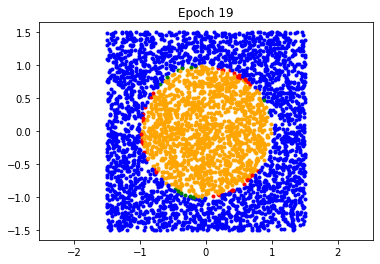

In [13]:
import matplotlib.pyplot as plt
def plot_resultats(model: keras.Model, save_fig=None):
    X_eval, _ = train_test_split(X, train_size=0.1) # Much faster, but has holes in the picture
    #X_eval = X[1::4] # Looks better but takes a long time
    Y_eval = model.predict(X_eval)
    plt.clf()
    plt.axis("equal")

    for x, y in zip(X_eval, Y_eval):
        truth = ( x[0]**2 + x[1]**2) <= 1
        dedans = True if np.argmax(y) == 0 else False
        if dedans:
            if  truth:
                plt.plot(x[0],x[1],".", color="orange")
            else:
                plt.plot(x[0],x[1],"g.")
        else:
            if truth:
                plt.plot(x[0],x[1],"r.")
            else:
                plt.plot(x[0],x[1], "b.")

    if save_fig is not None:
        plt.title(f"Epoch {save_fig}")
        plt.savefig(f'backup{save_fig}.png')

for i in range(20):
    print(f"Epoch {i}")
    if (i != 0):
        model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1, batch_size=32)
    plot_resultats(model, save_fig=i)

import imageio
images = [ imageio.imread(f'backup{i}.png') for i in range(20)]
imageio.mimsave('animated_gif.gif', images, duration=0.3)


Now that we have managed to build a very simple neural network, let's try to solve a more interesting problem.

# The MNIST Dataset

We will use the dataset called [Mnist](https://www.tensorflow.org/datasets/catalog/mnist), which is a collection of handwritten digits images widely used in Neural Network tutorials.


In order to train a neural network, we need 3 datasets:

1.   A **training set** (~80% of total data)
2.   A **validation set** (~10%)
3.   A **test set**   (~10%)

- The **training set** will allow you to train your neural network;
- The **validation set** will allow you to test your neural network during the training process in order to follow its progression;
- We keep an additional **test set** which does not interfere with the training in any way so that you are able to test your neural network after it has been trained.

In [14]:
# Here, we load the training and test sets.
mnist = tf.keras.datasets.mnist
(raw_x_train, raw_y_train), (x_test, y_test) = mnist.load_data()

# Let's see what kind of dataset we have
print(f"{raw_x_train.shape}") # The training set is composed of 60 000 images of size 28x28
print(f"{x_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


As you can see, the training set is composed of 60k images, and the test set of 10k images. We still need to create the the validation set. We will take 10% of the training set to make it  
You can also notice that we have images of size $28 \times 28$, and that they are in gray scale (otherwise, there would be one more dim (X, 28, 28, 3))

To split the training set, we will use a function from the **scikit-learn** library that we already used during the first session. Go search in its API how the `train_test_split()` function works!

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(raw_x_train, raw_y_train, test_size=0.1) # 3 arguments

In [16]:
# Let's see what dataset we now have
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)
(10000, 28, 28)
(10000,)


You should have the same number of entries for $x_{train}$ and $y_{train}$, for $x_{val}$ and $y_{val}$, and for $x_{test}$, $y_{test}$

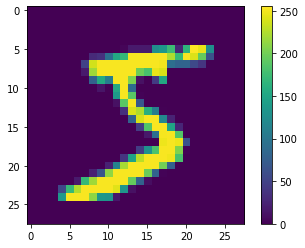

Class: 5


In [17]:
# Let's plot an image
plt.figure()
plt.imshow(raw_x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
# And print its class (expected output)
print(f"Class: {raw_y_train[0]}")

Do you remember the neural network input? It was under the form of a 1 dimensional vector, so we need to resize all the images (flatten) from (28, 28) to (28 * 28,) = (784,)

In [18]:
x_train = x_train.reshape(54000, 28 * 28)
x_val = x_val.reshape(6000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

And the output? It should the a 1D vector representing the classes (labels) under the one hot encoding form. So we use the `to_categorical()` **Keras** function to transform our classes (0, 1, 2, ..., 9) into one hot encoding.

In [19]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

y_test_no_onehot = y_test # We keep this here for the confusion matrix at the end ;)
y_test = tf.keras.utils.to_categorical(y_test)

We now have 3 datasets: train, val and test.
Now comes the model creation part!

To do that, we are going to create a neural network that takes our images as input and gives us the correct number in output.
So we need an input of size equal to the number of pixels in an image (28x28).
The output will have to be equal to the number of classes (one hot encoding: refer to the slides or ask for help if you did not understand!; 10 because we have 10 numbers).

You will create 3 layers:
* A **dense** layer with **128 neurons** (which takes 28x28 vectors as input)
* A **dense** layer with **64 neurons**
* An output layer, also **dense** with **10 neurons**

You will use the **sigmoid activation function for each dense layer**.
`model.summary()` will allow you to see more clearly with additional details your neural network.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [21]:
# Create your model here
# See https://keras.io/layers/core/ for details on how to create those layers ;)

model = Sequential([
    # Here goes some layers!
    # keras.layers.something...
    keras.layers.Dense(128, activation='sigmoid', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


You have now created a neural network! You now have to specify which loss function and which backpropagation method you want to use.
There are many of them but for this time, we will simply use **SGD** (Stockastic Gradient Descent), **categorical crossentropy** as the loss function and the **accuracy** as an additional metric that we want to display during the training.

In [22]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model.compile(
    optimizer=optimizers.SGD(), # you can also try "adam"
    loss=losses.CategoricalCrossentropy(from_logits=False), # you can also try "mse"
    metrics=['accuracy']
)

Everything is now ready to begin the training! Try to train your model on **10 epochs** with a **batch size of 64**.
The bravest ones can also try to specify a learning rate (the default learning rates are pretty good though!).

In [23]:
import time
start = time.time()

history = model.fit(
    x_train, y_train, validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64
)

print(f"Training done in {time.time() - start :.0f} seconds!")

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 1.6987 - accuracy: 0.6330 - val_loss: 1.2125 - val_accuracy: 0.7987
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.9492 - accuracy: 0.8329 - val_loss: 0.7401 - val_accuracy: 0.8613
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.6385 - accuracy: 0.8743 - val_loss: 0.5427 - val_accuracy: 0.8882
Epoch 4/10
844/844 [==============================] - 5s 5ms/step - loss: 0.4966 - accuracy: 0.8917 - val_loss: 0.4475 - val_accuracy: 0.8993
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4192 - accuracy: 0.9026 - val_loss: 0.3897 - val_accuracy: 0.9072
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3715 - accuracy: 0.9078 - val_loss: 0.3528 - val_accuracy: 0.9142
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3389 - accuracy: 0.9137 - val_loss: 0.3268 - val_accuracy: 0.9162
Epoch 

You can see your neural network make some progress after each step!
So you see the loss, the accuracy on the training set, along with both the loss and the accuracy on the validation set.

The following code allows to plot the evolution of the accuracy and the loss over time. It is always useful to look at the to see how your neural network evolves.

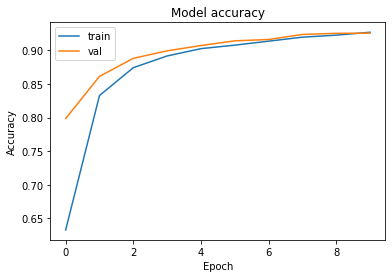

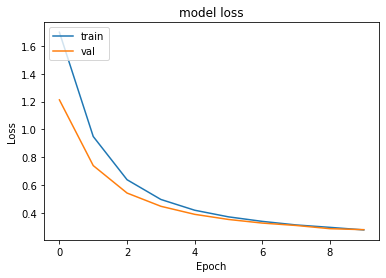

In [24]:
def plot_history(history):
    """
    Plots the accuracy and the loss
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_history(history)

If you see the loss decreasing and the accuracy increasing, it is usually good!
It is now time to test your neural network on the test dataset by using the `model.evaluate()` method.

In [25]:
# Evaluates your neural network on the test dataset
# Result: [loss, accuracy] (see https://keras.io/api/models/model_training_apis/#evaluate-method)
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2716 - accuracy: 0.9257


[0.2715950608253479, 0.9257000088691711]

In [26]:
res = model.predict(x_test) # We ask you neural network to predict on the inputs
print(f"Sample prediction -> {res[0]}") # We look at the first prediction

# The output is actually an array of size 10 with each value corresponding to
# the probability that the given image is of the class corresponding to the array index
# In res[0], the index having the highest value is the index 7, so the predicted class is 7
res = np.argmax(res, axis=1) # Argmax gives the index having the highest value (so here we have 7 for res[0])

# Let's look at the confusion matrix using sklearn!
from sklearn.metrics import confusion_matrix
import plotly.express as px
m = confusion_matrix(y_test_no_onehot, res, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fig = px.imshow(m, text_auto=True, labels={"x":"Predicted labels", "y":"True labels"})
fig.show()

313/313 [==============================] - 1s 3ms/step
Sample prediction -> [0.62178457 0.26010484 0.42372137 0.785984   0.20033634 0.21005803
 0.08617192 0.9991804  0.24246788 0.87926245]


## To go further

Your neural network should now work quite well but in reality, there are a few problems that may not have appeared here but that may appear depending on the initialization of weights and biases, the dataset, the architecture or other things.

### Activation functions

Until now, each layer had the sigmoid activation function $(\frac{1}{(1+\exp^{-x})})$
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Actually, there are others that work better. The problem with **sigmoid** is that when we do the gradient descent, we will calculate the partial derivatives in order to find where to modify the weights of our neurons. However, the derivative of sigmoid for values that are a little too large or too small will be equal to 0... So we end up with a gradient of 0 and our neural network will not train anymore. The same problem occurs with another activation function, **tanh**. This problem is known as "*vanishing gradient*".

Until now we used **sigmoid** but there are many that work much better than this one.

The most commonly used is **ReLU** (Rectified Linear Unit) which function is $ReLU(x) = \max(0, x)$, so the curve is:
<img src=https://cdn-images-1.medium.com/max/1600/1*DfMRHwxY1gyyDmrIAd-gjQ.png width="500">

Why do we use Relu?

1. Inexpensive to calculate
2. No vanishing gradient
3. It is linear and converges faster

Another famous function is **Softmax**. It is often used as the **last** activation function of a neural network.
There are plenty more of them, which some are derivatives of Relu; for instance, **Leaky ReLU** ou **ELU** but in practice, Relu should be enough.

If you really want to go deeper and increase your knowledge on the activation function, go watch the 30 first minutes of https://youtu.be/wEoyxE0GP2M.


## The gradient descent

![](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

Here is what happens in the case of a function in 3 dimensions. Of course, our neural network having many more parameters (sometimes several hundreds of thousands), the dimension is a bit higher.
Moreover, in this case, we can see that everything goes well, from the starting point taken, we manage to find the minimum of the function.
However, this is not always the case with the gradient descent algorithm. It often happens that we find a **LOCAL** minimum when we are really looking for the **global** minimum of the function. This is why other algorithms have been developed. The first idea was to add a momentum to the gradient descent: in other words, we add speed to our gradient descent, so we find the minimum more quickly.

![](https://media.giphy.com/media/SJVFO3IcVC0M0/giphy.gif)

Here is how different algorithms perform to find the minimum of a function. We can see that SGD (the basic gradient descent) is the slowest. **RMSProp** on the other hand, works quite well.

The most used of them is **Adam**. One of the characteristics of Adam is that there is **one learning rate per parameter**. Moreover, it is very easy to configure (most of the time, the default parameters will give you the best possible result)

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

Here is a comparison of the most popular optimizers. We can see that Adam performs the best. If you want to know everything about Adam and you have some time, [you can read the article here](https://arxiv.org/pdf/1412.6980.pdf). Or if you need more explanations, [check out this video](https://youtu.be/_JB0AO7QxSA) (the first part of the course is about optimizers).

## The dropout

One problem that can happen with your current neural network is that it suffers from **overfitting**. In other words, instead of learning to generalize well on data it has not yet seen (the test set), your neural network will learn the features of the training set and will underperform in the test phase. Imagine that we train a neural network to recognize cats and that on each of the images of the training set, the neural network sees the ears, the tail and the legs. If in the test game it only sees the ears and the paws, it might make a mistake and not identify the image as a cat.

For this, you can add some dropout. In other words, between 2 layers, we will "cut out" some connections. In other words, some neurons of layer $k$ will not send their output to layer $k_{+1}$.

Epoch 1/20
844/844 [==============================] - 3s 4ms/step - loss: 3.2057 - accuracy: 0.6410 - val_loss: 0.5542 - val_accuracy: 0.8602
Epoch 2/20
844/844 [==============================] - 3s 3ms/step - loss: 0.6990 - accuracy: 0.8166 - val_loss: 0.3660 - val_accuracy: 0.9082
Epoch 3/20
844/844 [==============================] - 3s 3ms/step - loss: 0.5083 - accuracy: 0.8635 - val_loss: 0.3099 - val_accuracy: 0.9267
Epoch 4/20
844/844 [==============================] - 3s 3ms/step - loss: 0.4120 - accuracy: 0.8897 - val_loss: 0.2566 - val_accuracy: 0.9352
Epoch 5/20
844/844 [==============================] - 3s 3ms/step - loss: 0.3530 - accuracy: 0.9038 - val_loss: 0.2242 - val_accuracy: 0.9393
Epoch 6/20
844/844 [==============================] - 3s 3ms/step - loss: 0.3064 - accuracy: 0.9170 - val_loss: 0.2051 - val_accuracy: 0.9445
Epoch 7/20
844/844 [==============================] - 3s 3ms/step - loss: 0.2793 - accuracy: 0.9227 - val_loss: 0.1929 - val_accuracy: 0.9470
Epoch 

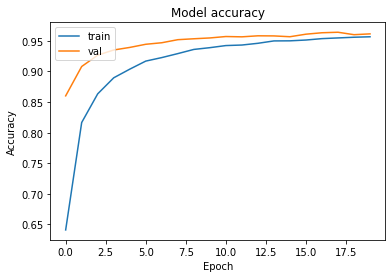

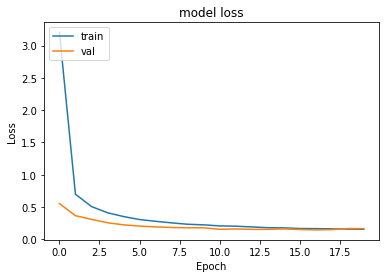

In [ ]:
# Now that you've seen all this, you should be able to build a neural network
# with the following characteristics:
# - For each layer, the activation function should be ReLU except for the last
#   one which will use Softmax
# - The optimizer should be Adam instead of SGD
# - Uses some dropout between each layer

model2 = keras.models.Sequential([ # Some layers
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss=losses.CategoricalCrossentropy(from_logits=False),
               metrics=['accuracy']
) # And here some params!

history2 = model2.fit(
    x_train, y_train, validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64 
) # Here too :3


print(model2.evaluate(x_test, y_test)) # Your score
plot_history(history2)



In [32]:
x_val.shape

(6000, 784)